In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# 1 Info & preprocessing

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
for feature in df.columns:
    if len(df[feature].unique()) == 1:
        print("will drop", feature)
        df.drop([feature], axis='columns', inplace=True)
# df.drop(['Gender','PerformanceRating', 'StockOptionLevel','EnvironmentSatisfaction','JobInvolvement','OverTime'], axis='columns', inplace=True)

will drop EmployeeCount
will drop Over18
will drop StandardHours


In [10]:
# Заменили значения удолетворенности работой булевым 
df.loc[df['JobSatisfaction'] <= 2, 'JobSatisfaction'] = 0
df.loc[df['JobSatisfaction'] > 2, 'JobSatisfaction'] = 1

# 2 LogisticRegression 

Тип задачи: кластеризации 
(удолетворен / неудолетворен)

In [11]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import numpy as np

In [12]:
y = df['JobSatisfaction']
X = df
X.drop(['JobSatisfaction'], axis='columns', inplace=True)

In [13]:
X.shape

(1470, 31)

In [14]:
# столбцы со строковыми значениями  
obj_f = ['Attrition',  'BusinessTravel', 'Department', 'EducationField', 'Gender', 
         'JobRole', 'MaritalStatus', 'OverTime']      

In [15]:
for feature in obj_f:
    print(feature, df[feature].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']


In [16]:
d = {'Yes': 1, 'No' : 0, 
     'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0,
     'Female':0, 'Male':1,
     'Single':0, 'Married':1, 'Divorced':2,
     'Life Sciences':5, 'Other':4, 'Medical':3, 'Marketing':2, 'Technical Degree':1, "Human Resources":0,
     'Sales':2, 'Research & Development':1,
    'Sales Executive':7, 'Research Scientist':6, 'Laboratory Technician':5, 'Manufacturing Director':4, 
     'Healthcare Representative':3, 'Manager':3, 'Sales Representative':2, 'Research Director':1
    }

In [17]:
# Замена строковых на числовые
for feature in obj_f:
    X[feature] = X[feature].apply(lambda x: d[x])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, stratify=y, test_size=0.2)

In [19]:
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_train)
clf_logreg.coef_
# coef-ты:
# модуль коэффицента показывает, насоклько он важен для классификации. 
# знак показывает..

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 9.10941532e-03, -1.64361471e-03,  1.91035308e-03,
         2.49998963e-04,  2.39812855e-03,  8.90759721e-05,
         8.33338561e-04,  1.08468350e-02,  1.80282252e-05,
        -1.48169677e-03,  2.19428547e-03, -4.29337181e-03,
         6.24088054e-04,  5.97230238e-04,  7.08579050e-03,
        -1.20893852e-03,  2.80406396e-05, -3.85669772e-07,
        -9.39116956e-03,  7.47085191e-04,  1.65007245e-02,
         2.02323118e-03, -5.81715672e-04, -1.40035708e-03,
        -1.79184118e-02,  2.85418390e-03,  1.57837772e-03,
        -5.80432525e-03, -3.14198466e-03, -8.46746069e-03,
        -8.77057172e-03]])

In [20]:
clf_logreg.predict_proba(X_test)

array([[0.3307968 , 0.6692032 ],
       [0.34624967, 0.65375033],
       [0.3363033 , 0.6636967 ],
       [0.35614938, 0.64385062],
       [0.4484609 , 0.5515391 ],
       [0.47551023, 0.52448977],
       [0.41250027, 0.58749973],
       [0.33006255, 0.66993745],
       [0.35253238, 0.64746762],
       [0.44827224, 0.55172776],
       [0.4365567 , 0.5634433 ],
       [0.35784059, 0.64215941],
       [0.37761719, 0.62238281],
       [0.33953909, 0.66046091],
       [0.37582958, 0.62417042],
       [0.3746415 , 0.6253585 ],
       [0.34578549, 0.65421451],
       [0.36554345, 0.63445655],
       [0.41888137, 0.58111863],
       [0.37567888, 0.62432112],
       [0.35900913, 0.64099087],
       [0.41324343, 0.58675657],
       [0.51112172, 0.48887828],
       [0.39437513, 0.60562487],
       [0.32778251, 0.67221749],
       [0.39436914, 0.60563086],
       [0.40620322, 0.59379678],
       [0.41510801, 0.58489199],
       [0.3899771 , 0.6100229 ],
       [0.37773146, 0.62226854],
       [0.

In [21]:
logreg_pred = clf_logreg.predict(X_test)
# tr=0.1
# p_hat = model.predict_proba(X_test)[:,-1] 
# y_pred1 = 1*(p_hat > tr)


# 3 Tree


In [22]:
!pip install graphviz

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt



In [25]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

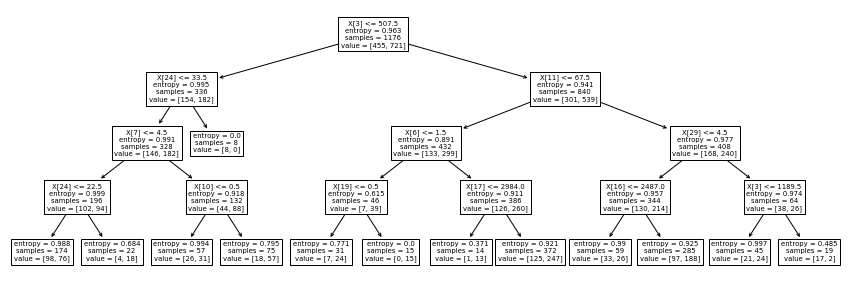

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,5))
plot_tree(clf_tree);

# 4 Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
# parameters = {
#     'criterion':['gini', 'entrioy'],
#     'n_estimators':[4, 6, 8, 10, 15, 20, 30],
#     'min_samples_leaf': [1, 2, 3, 5, 7, 10], 
#     'max_depth':[2, 3, 4, 5, 8, 20, 35, 100], 
#     'max_features':[3, 5, 10, "sqrt", 'log', None]
# }

# clf_forest = RandomForestClassifier()

# clf_grid = GridSearchCV(
#     estimator=clf_forest, 
#     param_grid=parameters, 
#     scoring='roc_auc', 
#     cv=5, 
#     n_jobs=-1
# )

# clf_grid.fit(X_train, y_train)
# print('Лучший результат:', clf_grid.best_score_)
# print('Лучшие параметры:', clf_grid.best_params_)

Лучший результат: 0.5596259631173425
Лучшие параметры: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 6}


In [29]:
clf_forest = RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt', min_samples_leaf=3, n_estimators=6)
clf_forest.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
feats = []
for feat, imp in zip(X.columns, clf_forest.feature_importances_):
    feats.append((imp, feat))
feats.sort()
feats

[(0.0, 'YearsInCurrentRole'),
 (0.0018174338770595652, 'StockOptionLevel'),
 (0.002964607817903421, 'JobLevel'),
 (0.0055541238837995815, 'Attrition'),
 (0.00683923399614401, 'Department'),
 (0.007271088016982974, 'PerformanceRating'),
 (0.008476588626528992, 'YearsWithCurrManager'),
 (0.00977803043000386, 'YearsSinceLastPromotion'),
 (0.012553742883563238, 'BusinessTravel'),
 (0.01313385866892786, 'EducationField'),
 (0.013664962810730593, 'RelationshipSatisfaction'),
 (0.013955795136728536, 'OverTime'),
 (0.015145332194476313, 'JobInvolvement'),
 (0.01610588067705002, 'TrainingTimesLastYear'),
 (0.01659466181356025, 'Gender'),
 (0.02521910736405224, 'WorkLifeBalance'),
 (0.026316511315905008, 'MaritalStatus'),
 (0.03120383448072509, 'EnvironmentSatisfaction'),
 (0.036182573868137, 'YearsAtCompany'),
 (0.038511123347390125, 'JobRole'),
 (0.03990256641761562, 'Age'),
 (0.04040289385727899, 'Education'),
 (0.047946523193995595, 'DistanceFromHome'),
 (0.05244870745177656, 'MonthlyIncome'



# 5 Сhoosing the best

In [31]:
from sklearn.metrics import roc_curve,  plot_roc_curve, confusion_matrix, recall_score, precision_score, accuracy_score


In [32]:
# Постоянный указатель на единицу
y_one = np.ones_like(y_test)
fpr1, tpr1, _ = roc_curve(y_test, y_one)
# Рандомный 
y_rand = np.random.choice([0,1], replace=True, size=y_test.size)
fprr, tprr, _ = roc_curve(y_test, y_rand)


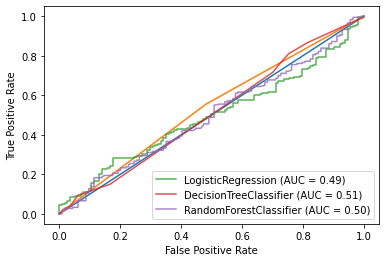

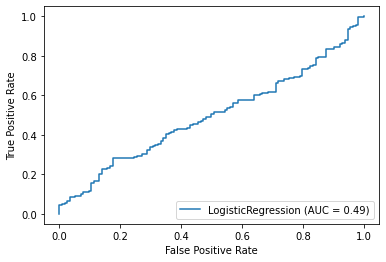

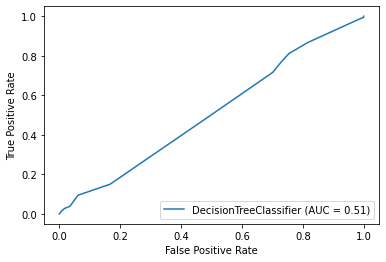

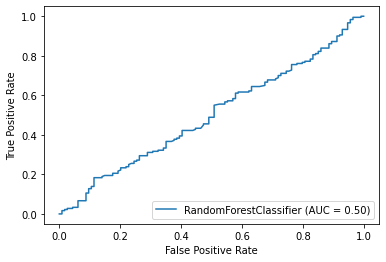

In [33]:
plt.plot(fpr1, tpr1) 
plt.plot(fprr, tprr)
ax = plt.gca()
p1 = plot_roc_curve(clf_logreg, X_test, y_test);
p2 = plot_roc_curve(clf_tree, X_test, y_test);
p3 = plot_roc_curve(clf_forest, X_test, y_test);
 

p1.plot(ax=ax, alpha=0.8)
p2.plot(ax=ax, alpha=0.8)
p3.plot(ax=ax, alpha=0.8)


plt.show()

# # plt.xlabel('')
# plt.ylabel('4')

Модель с лучшим показателем AUC(0,53) - лес

In [34]:
y_pred = clf_forest.predict(X_test)
print('Матрица ошибок')
confusion_matrix(y_pred, y_test)

Матрица ошибок


array([[  6,  12],
       [108, 168]])

In [35]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('Recall:', recall, 'Precision:', precision, 'Accuracy', accuracy)

Recall: 0.9333333333333333 Precision: 0.6086956521739131 Accuracy 0.5918367346938775


In [36]:


# YearsSinceLastPro разбить на два значения